In [7]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import densenet
from keras.applications.densenet import DenseNet201, DenseNet121
from keras.applications.densenet import preprocess_input as densenet_preprocessor_input
from keras.applications.densenet import decode_predictions as densenet_decode_predictions


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

#vgg16model = VGG16(weights='imagenet')
dense201model = DenseNet201(weights='imagenet')
#dense121model = DenseNet121(weights='imagenet')


(1, 56, 56, 96)


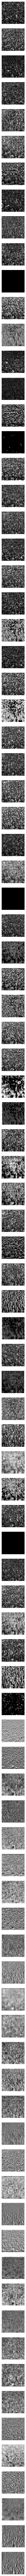

In [8]:
# redefine model to output right after the first hidden layer
output_layerno = 13
model = Model(inputs=dense201model.inputs, outputs=dense201model.layers[output_layerno].output)

#model.summary()
# load the image with the required shape
img = load_img('/home/arshad/crowd.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

width, height, features = feature_maps.shape[1], feature_maps.shape[2], feature_maps.shape[3]
print(feature_maps.shape)

#overwrite width and height since src is too small (56,56)
width, height = 200, 200
figsize = width, height

fig, ax = pyplot.subplots(features, 1, figsize=figsize)

for i in range(0,features):
    # specify subplot and turn of axis
    ax[i].axis('off')
    ax[i].imshow(feature_maps[0, :, :, i],   cmap='gray')

# show the figure
pyplot.show()